# Sprint5課題 機械学習スクラッチSVM

## この課題の目的

- スクラッチを通してSVMを理解する
- 線形モデルと異なる手法に触れる

### 方向性の整理

1. 問題理解：
    - 何が問題か？
        - 分類？回帰？ => 今回は分類
        - サポートベクトルと決定領域間の距離（マージン）の最小値を最大化する（min, max問題）
    - Output（出力）は何か？ ： パラメータ => 線形和の係数
    - Process（学習・予測のロジック）は？ => ラグランジュ未定乗数
    - Input（入力）は何か？ => 学習データ（Numpy配列：m_samples, n_features）


2. NOT TO DO：
    - いきなりコードを書かない ： まずコーディングの流れ（枠組み）をコメントで列挙する。コメントだけでロジックが通っているか？
    - 一度に沢山作らない。 ： 少し作る => 検証 => デバッグ => 少し作る....　（小さく検証しながら進める）
    - 関数化できるものは関数化する : 変数をローカルに限定すればデバッグが楽


3. TO DO：
    - Input, Outputを明確化してコメントに書く : 
    - 行列の形状（shape）を出力するprint関数をセットする：行列演算のエラーを回避するため
    - テストシナリオを作る : 変数宣言時に関数名と異なる変数名を定義すること





### 【問題1】SVM分類器のクラスを作成する

- 何が問題か？（出力は何か？）
    - パラメータ(theta)
    - ラグランジュ乗数（λ）


- どのような流れでコーディングするか？

    1. 損失関数を定義する : 最小化対象（＝損失）は、点と線の間の距離（マージン） => 損失関数　= 距離の関数
    
    2. 損失関数を用いて何を出力したいのか？ => サポートベクトル（SV：最も直線と距離が近い点）
    
    3. SVを求めた後に何をするのか？ => SVと決定境界（直線）の間のマージンを求める。このマージンは、所与のデータセット（x）、パラメータ(theta)に対して最小の値を取っている。
    
    4. マージンを求めてどうするのか？ => マージンを最大化するパラメータ（theta）を求める
    
    5. 所与のデータセット（x, y）に対する$L(λ)$を求める必要あり。


- どのような関数が必要か？
    
    １.損失関数（マージン） : 学習曲線の描写に用いる 
    
    2.ラグランジュ

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import sys

sys.path.append("/Users/makintosh/diveintocode-term1/ml-scratch")

from utils.ScratchSVM import ScratchSVC

#### サンプルデータセット１で検証する

In [3]:
import numpy as np

np.random.seed(seed=0)
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))

# 説明変数
X = X[random_index]
y = y[random_index]

In [4]:
# サンプルデータを分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 線形カーネル

In [5]:
# インスタンス生成
clf = ScratchSVC()

In [6]:
# 学習
clf.fit(X_train, y_train)

In [7]:
import pandas as pd

# 予測
y_pred = clf.predict(X_test)

df = pd.DataFrame(y_test, columns=["y_true"]) # 正解値
df["y_pred"] = y_pred # 予測値

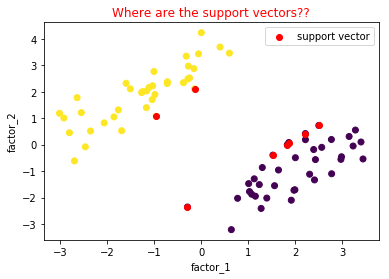

In [8]:
# サポートベクターを可視化
clf.scatter_plot_sv(X_train, y_train)

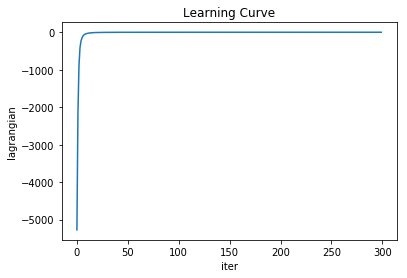

In [9]:
# 学習曲線
clf.show_learning_curve()

### 【問題2】（アドバンス課題）多項式カーネル関数の作成

In [10]:
# 多項式カーネルでインスタンス化
clf_poly = ScratchSVC(kernel="polinomial", gamma=2, coef0=1, degree=3)

# 学習
clf_poly.fit(X_train, y_train)

In [11]:
import pandas as pd

# 予測
y_pred = clf.predict(X_test)

df = pd.DataFrame(y_test, columns=["y_true"])
df["y_pred"] = y_pred

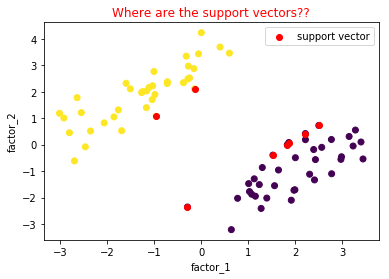

In [12]:
# サポートベクターを可視化
clf_poly.scatter_plot_sv(X_train, y_train)

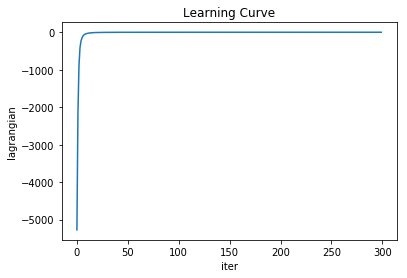

In [13]:
# 学習曲線
clf_poly.show_learning_curve()

### 【問題3】指標値の算出

分類に関する指標値で精度を確認してください。

- 正確度 (accuracy_score)
- 適合率 (precision_score)
- 再現率 (recall_score)
- F-値 (f_score)
- AUC

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

In [15]:
# スコアリング
accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# 出力
print("accuracy : {}".format(accuracy_score))
print("precision : {}".format(precision_score))
print("recall : {}".format(recall_score))
print("f1 : {}".format(f1_score))

# AUC(Compute Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
auc = metrics.auc(fpr, tpr)
print("auc : {}".format(round(auc,2)))

accuracy : 1.0
precision : 1.0
recall : 1.0
f1 : 1.0
auc : 1.0


### 【問題4】決定領域の可視化

2値分類のデータセットに対して決定領域を可視化してください。

これまで使用してきた関数に、サポートベクターを色を変えて表示する機能を加えてください。

特にSprint0で作成したシンプルデータセット1に対して以下のように分類ができるかを検証してください。

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, sv_index = None, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    sv_index : list
        サポートベクターのindex
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    
    # plot support vector
    if sv_index is not None:
        plt.scatter(X_train[sv_index][:, 0], X_train[sv_index][:,1], c = "#ffff33", label = "support vector")
    
    plt.legend()
    plt.show()

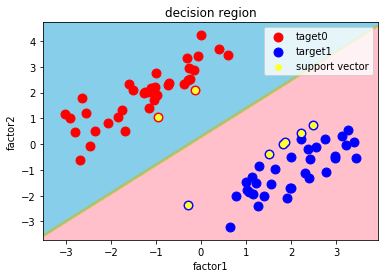

In [17]:
# サポートベクターのインデックスを取得
sv_index = clf.sv_index

decision_region(X_train, y_train, clf, sv_index=sv_index,  xlabel="factor1", ylabel="factor2", target_names = ["taget0", "target1"])

### 【問題5】時間の計測

SVMの学習には時間がかかるため、効率的な実装が望まれます。事前学習期間に行なったように、時間を計測して改善していきましょう。特にλの更新部分は繰り返し処理が多いため、効率的なコードを目指してください。

In [18]:
import time
t0 = time.time()

# 学習
clf.fit(X_train, y_train)

t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 30.399636030197144s


### 【問題6】ロジスティック回帰とSVM

最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

- ロジスティック回帰とSVMは本質的に何が異なっているか?

- 「予測値が確率的か否か」が本質的な違いと考える。


- ロジスティック回帰による予測は、あるデータサンプルが、学習によって求めた決定領域に属する確率を返した上で、同確率が閾値を超えるか否かで予測値を判定する。シグモイド関数の値x（予測確率）は0<$x$<１であることことから、曖昧さを許容しながらも、その中で尤もらしい予測を追求している。


- SVMは、学習によって求めた分類境界線を用いて、予測値を一意に定める。特に多項式カーネルを用いた高次元空間での分類は、極めて決定論的（いかに隙間を縫って分類境界線を引けるか）だと思う。

### 本課題からの学び

1. SVMの計算に時間がかかる理由は？
    - サポートベクトルの探索に時間がかかる（＝全てのサンプルについて総当たりでマージンを計算する必要があるため。行列演算で一度に処理できれば処理速度が向上すると思われる。）
    
    - 多項式カーネル（高次元空間での分類）の有用性を感じた。さらに理解を深めていきたい。


- 最急降下法による学習の要点は、目的関数の定義、パラメータの逐次更新にあると理解できた。


- データセット、予測結果（学習曲線、決定領域、サポートベクター）を可視化して、モデルがしっかり機能しているか逐次確認すると良い。